# Some basic statistical concepts and tools 
<br><br>
<div style="background-color:rgba(128, 128, 0, 0.1); text-align:left; vertical-align: middle; padding:20px 0;">
<p style="font-size:134%;color:Deep Teal;">SC 4125: Developing Data Products</p>
    <p style="font-size:100%;color:Olive;">Module-7: Statistical toolkit</p><br>

    
<br> 
by <a href="https://personal.ntu.edu.sg/anwitaman/" style="font-size:100%;color:Deep Teal;">Anwitaman DATTA</a><br>
School of Computer Science and Engineering, NTU Singapore.        
</div>

#### Teaching material
- <a href="M7-StaTest.slides.html">.html</a> deck of slides
- <a href="M7-StaTest.ipynb">.ipynb</a> Jupyter notebook

### Disclaimer/Caveat emptor

- Non-systematic and non-exhaustive review
- Illustrative approaches are not necessarily the most efficient or elegant, let alone unique

### Acknowledgement & Disclaimer

> The main narrative of this module is based on the first three chapters of the book <a href="https://www.oreilly.com/library/view/practical-statistics-for/9781491952955/">Practical Statistics for Data Scientists</a> by Bruce et al. 
>
>Data and code in this module are also copied & adapted from the <a href="https://github.com/gedeck/practical-statistics-for-data-scientists">github</a> resources accompanying the book, following *fair use* permission provided by the authors and publisher as per in the book's preface. 
>
> Few other online sources and images have also been used to prepare the material in this module. Original sources have been attributed and acknowledged to the best of my abilities. Should anything in the material need to be changed or redacted, the copyright owners are requested to contact me at anwitaman@ntu.edu.sg
<center>
<a href="https://www.oreilly.com/library/view/practical-statistics-for/9781491952955/"><img src="pics/PracticalStatsCoverPage.jpg" alt="Big picture" width="140"/></a></center>

### Module outline

> <span style="color:olivedrab">Bare basics</span>

> <span style="color:olivedrab">Sampling</span>

> <span style="color:olivedrab">Statistical experiments & significance</span>

In [1]:
# Library imports & data directory path  
import pandas as pd
import numpy as np
from scipy.stats import trim_mean
from statsmodels import robust
#!pip install wquantiles
import wquantiles

import seaborn as sns
import matplotlib.pylab as plt
import random
practicalstatspath ='data/practical-stats/' # change this to adjust relative path

## <span style="color:olivedrab">Bare basics</span>

<center><img src="pics/correlation.png" alt="Big picture" width="500"/></center>

Image source: <a href="https://xkcd.com/552/">XKCD</a>

Estimates of <span style="color:indianred"><b>location</b></span>

<b>location</b>: Where is the data (in a possibly multi-dimensional space)? Its typical value, i.e., its <span style="color:SteelBlue">central tendency</span> 

> <b>mean</b>

> <b>weighted mean</b>: $\bar{x_w}=\frac{\sum_{i=1}^n{w_i x_i}}{\sum_{i=1}^n{w_i}}$

> <b>trimmed mean</b>: $\bar{x}=\frac{\sum_{i=p+1}^{n-p}{x_{(i)}}}{n-2p}$ where $x_{(i)}$ is the _i_-th largest value, _p_ is the trimming parameter. 
>> Robust estimate: eliminates influence of extreme values, i.e., <span style="color:SteelBlue">outliers</span>

> <b>median</b>

> <b>percentile</b>

#### Example: US states murder rates

In [2]:
state_df = pd.read_csv(practicalstatspath+'state.csv')
state_df.head()

,State,Population,Murder.Rate,Abbreviation
0,Alabama,4779736,5.7,AL
1,Alaska,710231,5.6,AK
2,Arizona,6392017,4.7,AZ
3,Arkansas,2915918,5.6,AR
4,California,37253956,4.4,CA


In [3]:
print('Mean: '+str(state_df['Population'].mean()))
print('Median: '+str(state_df['Population'].median()))
print('Trimmed Mean: '+str(trim_mean(state_df['Population'], 0.1))) # from scipy.stats

Mean: 6162876.3
Median: 4436369.5
Trimmed Mean: 4783697.125


How about national mean and median murder rates? Try to compute that yourselves!

Estimates of <span style="color:indianred"><b>variability</b></span>

<b>variability</b>: Whether and how clustered or dispersed is the data?

- <b>variance</b>: $s^2=\frac{\sum_i^n(x_i-\bar{x})^2}{n-1}$ where $\bar{x}$ is the mean
    * division by n-1 to create a unbiased estimate (since there are n-1 degrees of freedom, given $\bar{x}$)

- <b>standard deviation</b>: $s=\sqrt{\frac{\sum_i^n(x_i-\bar{x})^2}{n-1}}$
    * has the same scale as the original data

- some other measures:
    * <b>mean absolute deviation</b>
    * <b>mean absolute deviation from the median (MAD)</b>
    * percentiles &  <b>interquartile range (IQR)</b>

In [4]:
print('Std. Dev.: '+str(state_df['Population'].std())) # standard deviation
print('IQR: '+str(state_df['Population'].quantile(0.75) - state_df['Population'].quantile(0.25))) # IQR
print('MAD: '+str(robust.scale.mad(state_df['Population']))) # MAD computed using a method from statsmodels library

Std. Dev.: 6848235.347401142
IQR: 4847308.0
MAD: 3849876.1459979336


#### Visualizing the deviation/distribution of data

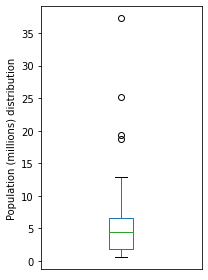

In [5]:
ax = (state_df['Population']/1000000).plot.box(figsize=(3, 4))
# visualizing the distribution of the quartiles
x_axis = ax.axes.get_xaxis()
x_axis.set_visible(False)
ax.set_ylabel('Population (millions) distribution')
plt.tight_layout()
plt.show()

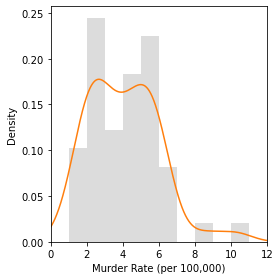

In [6]:
ax = state_df['Murder.Rate'].plot.hist(density=True, xlim=[0, 12], facecolor='gainsboro',
                                    bins=range(1,12), figsize=(4, 4))
state_df['Murder.Rate'].plot.density(ax=ax)
ax.set_xlabel('Murder Rate (per 100,000)')

plt.tight_layout()
plt.show()

#### <span style="color:indianred"><b>Correlation</b></span>

Pearson's correlation coefficient: $\frac{\sum_{i=1}^n (x_i-\bar{x})(y_i-\bar{y})}{(n-1)s_xs_y}$

In [7]:
gapminderdatapath ='data/gapminder/' # change this to adjust relative path
gap_df = pd.read_csv(gapminderdatapath+'gapminder.tsv', sep='\t')
gap_df['lifeExp'].corr(gap_df['gdpPercap'])

0.5837062198659806

In [8]:
gap_df[['lifeExp','pop','gdpPercap']].corr()

,lifeExp,pop,gdpPercap
lifeExp,1.000000,0.064955,0.583706
pop,0.064955,1.000000,-0.025600
gdpPercap,0.583706,-0.025600,1.000000


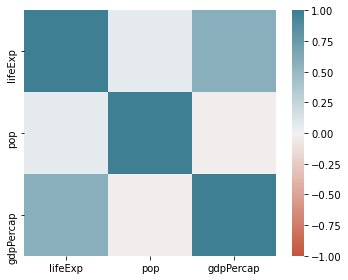

In [9]:
fig, ax = plt.subplots(figsize=(5, 4))
ax = sns.heatmap(gap_df[['lifeExp','pop','gdpPercap']].corr(), vmin=-1, vmax=1, 
                 cmap=sns.diverging_palette(20, 220, as_cmap=True),
                 ax=ax)
plt.tight_layout()
plt.show()

#### Alternatives

- Instead of correlation of the values, if we wanted to work with ranks:
    * <a href="https://en.wikipedia.org/wiki/Spearman%27s_rank_correlation_coefficient">Spearman’s $\rho$</a> 
    * <a href="https://en.wikipedia.org/wiki/Kendall_rank_correlation_coefficient">Kendall’s $\tau$</a> 
    
<b>Recall</b>: We earlier encountered the idea of ranking based correlation in Module 2!

## <span style="color:olivedrab">Sampling<span>

<img src="pics/catsdogspopulationsample.png" alt="Sampling" width="400"/><br>

- Underlying unknown distribution (left)
- Empirical distribution of the available sample (right)

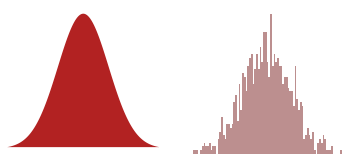

In [10]:
from scipy import stats # https://docs.scipy.org/doc/scipy/reference/tutorial/stats.html
np.random.seed(seed=5)
x = np.linspace(-3, 3, 300) # Return evenly spaced numbers over the specified interval
xsample = stats.norm.rvs(size=1000) # generate 1000 random variates for 'norm'al distribution
fig, axes = plt.subplots(ncols=2, figsize=(6, 2.7))
ax = axes[0]
ax.fill(x, stats.norm.pdf(x),'firebrick') # Probability Density Function
ax.set_axis_off()
ax.set_xlim(-3, 3)
ax = axes[1]
ax.hist(xsample, bins=100,color='rosybrown') # Histogram of the random variate samples
ax.set_axis_off()
ax.set_xlim(-3, 3)
ax.set_position
# plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0)
plt.show()

#### Big data & sampling

- Now that we have scalable Big data processing tools, why bother with samples? 

* quality of the data collection may vary
    - e.g., in an IoT set-up, sensors may have different degrees of defectiveness

* the data may not be representative
    - e.g., using social media data to gauge the nation's sentiment 
        * are all sections of the society rightly represented on social media?  

* time and effort spent on random sampling may help reduces bias and make it easier to explore
    - visualize and manually interpret information (including missing data/outliers) 

#### (Uniform) random sampling

- each available member of the population being sampled has <span style="color:SteelBlue">an equal chance of being chosen</span>
    * <b>with replacement</b>: observations are put back in the population after each draw 
        * for possible future reselection
    * <b>without replacement</b>
        * once selected, unavailable for future draws

- <b>Stratified sampling</b>: Dividing the population into strata and randomly sampling from each strata.
- Without stratification
    * a.k.a. <b>simple random sampling</b>

2020 US presidential election |  FiveThirtyEight projection
:-------------------------:|:-------------------------:
<img src="pics/538-1.png" alt="Sampling" width="300"/>  |  <img src="pics/538-2.png" alt="Sampling" width="300"/>
Screenshots from https://projects.fivethirtyeight.com/2020-election-forecast/

#### Bias 

- Not always obvious <span style="color:SteelBlue">how to get a good random sample</span>
    * e.g., customer behavior: time of the day, day of the week, period of the year
    * Anecdotes: <a href="https://en.wikipedia.org/wiki/The_Literary_Digest#Presidential_poll">The literary digest <b>presidential poll of 1936</b></a>
         * Polled ten million individuals, of whom 2.27 million responded
         * The magnitude of the magazine's error: 39.08% for the popular vote for Roosevelt v Landon
         * <b>Gallup</b> correctly predicted the results using a much smaller sample size of just 50,000
         * Contemporary claim to fame <a href="https://en.wikipedia.org/wiki/FiveThirtyEight">Nate Silver & FiveThirtyEight</a> 
             * "balance out the polls with comparative demographic data"

- **Selection bias**: selectively choosing data—consciously or unconsciously—in a way that leads to a conclusion that is misleading or ephemeral 
    * e.g., <span style="color:SteelBlue">Regression to the mean</span>: Is your coin really 'lucky'?

- **Data snooping**: extensive hunting through data in search of something interesting
    * e.g., Crowd-sourced coin tossing to find a `lucky coin' 
- **Vast search effect**: Bias or nonreproducibility resulting from repeated data modeling, or modeling data with large numbers of predictor variables.
    * Beware the promise of Big Data: You can run many models and ask many questions. But is it really a needly that you find in the haystack?
        * Mitigations: <b>Holdout set</b>, <a href="https://www.elderresearch.com/resource/innovations/target-shuffling-process/"><b>Target shuffling</b></a>

#### Methodology check-point

<img src="pics/statistical-inference-pipeline.png" alt="Statistical Inference Pipeline" width="600"/>

- Specify <b><span style="color:indianred">hypothesis first</span></b>, then design experiment and accordingly collect data following randomization principles to <span style="color:SteelBlue">avoid falling into the traps of biases</span>
- <b>Traps of biases</b>  resulting from the data collection/analysis process:
    * repeated running of models in data mining & data snooping
    * after-the-fact selection of interesting events

#### <span style="color:indianred">Sampling distribution of a statistic</span>

**Sampling distribution**: *distribution of some sample statistic* over many samples drawn from the same population.

**Standard error**: The variability (standard deviation) of a sample statistic over many samples (not to be confused with standard deviation, which by itself, refers to variability of
individual data values)

**Central Limit Theorem**: The tendency of the sampling distribution to take on a *normal shape* as the sample size rises.

In [11]:
# Central Limit Theorem in action - an example

loans_income = pd.read_csv(practicalstatspath+'loans_income.csv', squeeze=True)

sample_data = pd.DataFrame({
    'income': loans_income.sample(1000),
    'type': 'Data',
})

sample_mean_05 = pd.DataFrame({
    'income': [loans_income.sample(5).mean() for _ in range(1000)],
    'type': 'Mean of 5',
})

sample_mean_10 = pd.DataFrame({
    'income': [loans_income.sample(10).mean() for _ in range(1000)],
    'type': 'Mean of 10',
})

sample_mean_20 = pd.DataFrame({
    'income': [loans_income.sample(20).mean() for _ in range(1000)],
    'type': 'Mean of 20',
})

results = pd.concat([sample_data, sample_mean_05, sample_mean_10, sample_mean_20])
#print(results.sample(10))

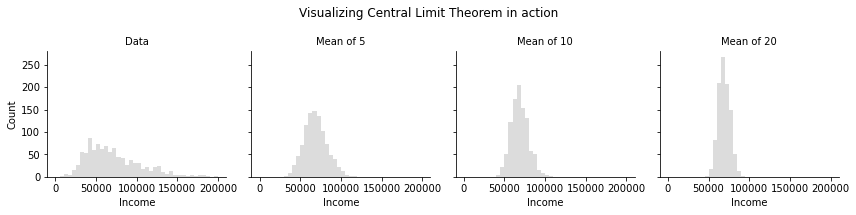

In [12]:
g = sns.FacetGrid(results, col='type', col_wrap=4, height=3, aspect=1)
g.map(plt.hist, 'income', range=[0, 200000], bins=40, facecolor='gainsboro')
g.set_axis_labels('Income', 'Count')
g.set_titles('{col_name}')
g.fig.suptitle('Visualizing Central Limit Theorem in action')
plt.tight_layout()
plt.show()

### Confidence interval

- <b><span style="color:indianred">x% confidence interval</span></b>: It is the interval that encloses the central x% of the *bootstrap sampling distribution* of a sample statistic
- <span style="color:SteelBlue">Bootstrap sampling</span> based confidence interval computation
    1. Draw a random sample of size n with replacement from the data (a resample)
    2. Record the statistic of interest for the resample
    3. Repeat steps 1–2 many (R) times
    4. For an x% confidence interval, trim [(100-x) / 2]% of the R resample results from
either end of the distribution
    5.  The trim points are the endpoints of an x% bootstrap confidence interval


In [13]:
from sklearn.utils import resample
#print('Data Mean: '+str(loans_income.mean()))
np.random.seed(seed=3)  
# create a sample of 20 loan income data
#sample20 = resample(loans_income, n_samples=20, replace=False)
#print('Sample Mean: '+str(sample20.mean()))
results = []
for _ in range(500):
    sample = resample(loans_income, n_samples=20, replace=True)
    #sample = resample(sample20) # One could also use a small initial sample, to keep re-sampling
    results.append(sample.mean())
results = pd.Series(results)

confidence_interval = list(results.quantile([0.05, 0.95]))

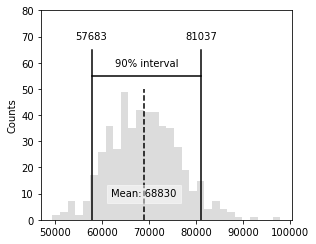

In [14]:
ax = results.plot.hist(bins=30, facecolor='gainsboro', figsize=(4.5,3.5))
ax.plot(confidence_interval, [55, 55], color='black')
for x in confidence_interval:
    ax.plot([x, x], [0, 65], color='black')
    ax.text(x, 70, f'{x:.0f}', horizontalalignment='center', verticalalignment='center')
ax.text(sum(confidence_interval) / 2, 60, '90% interval', horizontalalignment='center', verticalalignment='center')
meanIncome = results.mean()
ax.plot([meanIncome, meanIncome], [0, 50], color='black', linestyle='--')
ax.text(meanIncome, 10, f'Mean: {meanIncome:.0f}', bbox=dict(facecolor='white', edgecolor='white', alpha=0.5),
        horizontalalignment='center', verticalalignment='center')
ax.set_ylim(0, 80)
ax.set_ylabel('Counts')
plt.tight_layout()
plt.show()

#### Interpreting confidence interval

> A note of <b>caution</b>: Confidence interval <span style="color:indianred">DOES NOT</span> answer the question <span style="color:SteelBlue">“What is the probability that the true value lies within a certain interval?”</span> 

## <span style="color:olivedrab">Statistical experiments & significance</span>

> In 2012 a Microsoft employee working on Bing had an <span style="color:SteelBlue">idea about changing the way the search engine displayed ad headlines</span>. Developing it wouldn’t require much effort—just a few days of an engineer’s time—but it was one of hundreds of ideas proposed, and the program managers deemed it a low priority. So it languished for more than six months, until an engineer, who saw that the cost of writing the code for it would be small, launched <span style="color:SteelBlue">a simple online controlled experiment</span><span style="color:indianred">—an A/B test—</span>to assess its impact. Within hours the new headline variation was producing abnormally high revenue, triggering a “too good to be true” alert. Usually, such alerts signal a bug, but not in this case. An analysis showed that the change had <span style="color:SteelBlue">increased revenue by an astonishing 12%—which on an annual basis would come to more than $100 million in the United States alone</span>—without hurting key user-experience metrics. It was the best revenue-generating idea in Bing’s history, but until the test its value was underappreciated.

Source: https://hbr.org/2017/09/the-surprising-power-of-online-experiments

### Statistical inference pipeline

<img src="pics/statistical-inference-pipeline.png" alt="Statistical Inference Pipeline" width="600"/>

<br>Design experiment (typically, an <span style="color:indianred"><b>A/B test</b></span>):
An A/B test is an experiment with two groups to establish which of two treatments,
products, procedures, or the like is superior. Often one of the two treatments is the
standard existing treatment, or no treatment. If a standard (or no) treatment is used,
it is called the control. A typical hypothesis is that a new treatment is better than the
control.

<center><img src="pics/BingCOlors.png" alt="Bing Color effect as reported in Harvard Business Review" width="370"/></center>

Image source: Harvard Business Review

<center><img src="pics/ABTestKeyTerms.png" alt="Key terms used in A/B testing" width="600"/></center>

#### Randomization 
- Ideally, subjects ought to be assigned randomly to treatments.
- Then, any difference between the treatment groups is due to one of two things
    - Effect of different treatments
    - Luck of the draw
        * Ideal randomization may not always be possible

#### Control group

- Why not just compare with the original baseline? 
    * Without a control group, there is no assurance that “all other things are equal”

#### Blinding

- Blind study: A blind study is one in which the subjects are unaware of whether they are getting treatment A or treatment B
- Double-blind study: A double-blind study is one in which the investigators and facilitators also are unaware which subjects are getting which treatment
    * Blinding maynot always be feasible

#### Ethical & legal considerations

- In the context of web applications and data products, do you need permission to carry out the study?
    * Anecdotes 
        * Facebook's <a href="https://www.pnas.org/content/pnas/111/24/8788.full.pdf">emotion study </a> on its feeds was <a href="https://www.theguardian.com/technology/2014/jun/30/facebook-emotion-study-breached-ethical-guidelines-researchers-say">hugely controversial</a>
        * OKCupid's <a href="https://www.theguardian.com/technology/2014/jul/29/okcupid-experiment-human-beings-dating">study on compatibilty & matches</a>      

#### Interpreting A/B test results with statistical rigour

- Human brain/intuition is (typically) not good at comprehending or interpreting randomness 
- <b>Hypothesis testing</b>
    >  <span style="color:indianred">Assess whether random chance is a reasonable explanation for the observed difference between treatment groups</span>

#### Hypothesis testing

- Null hypothesis $H_{0}$
- Alternative hypothesis $H_1$
    - Variations:
        * one-way/one-tail, e.g. $H_{0} \leq \mu $, $H_1 > \mu$ 
        * two-way/two-tail, e.g., $H_{0} = \mu$, $H_1 \neq \mu$ 
- <b>Caution</b>: <span style="color:SteelBlue">One only rejects, or fails to reject the Null hypothesis</span>
    - <span style="color:indianred"><b>DOES NOT PROVE</b></span> anything
        * May nevertheless be `good enough' for a lot of decisions

#### Resampling

> Resampling in statistics means to repeatedly sample values from observed data, with a
general goal of assessing random variability in a statistic

> Broadly, two variations:
> - Bootstrap
>    * We saw this variant earlier, when exposing the idea of Central Limit Theorem
> - <span style="color:indianred">Permutation tests</span>
>    * Typically, this is what is used for hypothesis testing 
     * A special case is an <span style="color:SteelBlue">exhaustive permutation test</span> (practical only for small data sets)

#### Permutation test

<img src="pics/PermTest.png" alt="Statistical Inference Pipeline" width="600"/>

#### Permutation test

Compare observed difference between groups and to the set of permuted differences. 

><b>If</b> the observed difference lies well within the set of permuted differences
>- Can <span style="color:SteelBlue">NOT reject Null hypothesis</span>
>
><b>Else</b>
>- The difference is statistically significant, i.e., <span style="color:indianred">reject Null hypothesis</span>

#### Web stickiness example

In [15]:
# Data
session_times = pd.read_csv(practicalstatspath+'web_page_data.csv')
session_times.Time = 100 * session_times.Time
session_times.head()

,Page,Time
0,Page A,21.0
1,Page B,253.0
2,Page A,35.0
3,Page B,71.0
4,Page A,67.0


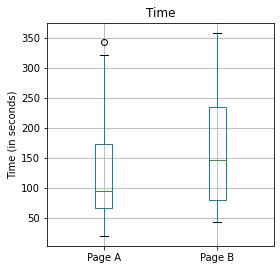

In [16]:
# Understanding the data visually
ax = session_times.boxplot(by='Page', column='Time', figsize=(4, 4))
ax.set_xlabel('')
ax.set_ylabel('Time (in seconds)')
plt.suptitle('')

plt.tight_layout()
plt.show()

In [17]:
# We will use "mean" as the statistics
mean_a = session_times[session_times.Page == 'Page A'].Time.mean()
mean_b = session_times[session_times.Page == 'Page B'].Time.mean()
print(mean_b - mean_a)

35.66666666666667


In [18]:
# Permutation test example with stickiness
# Creating the permutation functionality
def perm_fun(x, nA, nB):
    n = nA + nB
    idx_B = set(random.sample(range(n), nB))
    idx_A = set(range(n)) - idx_B
    return x.loc[idx_B].mean() - x.loc[idx_A].mean()
    
nA = session_times[session_times.Page == 'Page A'].shape[0]
nB = session_times[session_times.Page == 'Page B'].shape[0]
print(perm_fun(session_times.Time, nA, nB))

-8.790476190476198


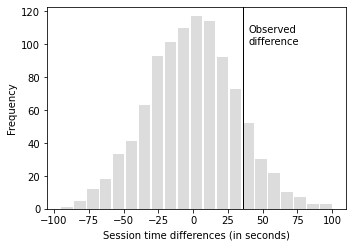

In [19]:
# Repeating the permutation experiment R times
R=1000
random.seed(1) # Using a seed helps make the randomized expeirments deterministic
perm_diffs = [perm_fun(session_times.Time, nA, nB) for _ in range(R)]

fig, ax = plt.subplots(figsize=(5, 3.54))
ax.hist(perm_diffs, bins=21, rwidth=0.9,facecolor='gainsboro')
ax.axvline(x = mean_b - mean_a, color='black', lw=1)
ax.text(40, 100, 'Observed\ndifference')
ax.set_xlabel('Session time differences (in seconds)')
ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

#### <span style="color:SteelBlue">p-value</span>

In what fraction of permutations does the difference in means exceed the observed difference?

In [20]:
len([x for x in perm_diffs if x > (mean_b - mean_a)])/len(perm_diffs)

0.121

In what fraction of permutations does the difference in means exceed the observed difference?

> A rather large fraction! 

For the observed difference to be "meaningful", it needs to be outside the range of chance variation. Otherwise, it is NOT statistically significant. 

> Therefore, we <span style="color:indianred">do NOT reject the Null hypothesis</span>

> <span style="color:indianred">Smaller the p-value, stronger the evidence to reject the Null hypothesis</span>

<img src="pics/p-value.webp" alt="Statistical Inference Pipeline" width="600"/>

Image source: https://www.simplypsychology.org/p-value.html

#### Level of confidence, singnificance & p-value

- Choose the rigour of your statistical test upfront:
    - Level of confidence: $C$
    - Level of significance $\alpha=1-C$
        > <span style="color:indianred">If p-value is smaller than $\alpha$ then reject Null hypothesis!</span> 

What <span style="color:SteelBlue">p-value represents</span>:
> The probability that, given a chance model, results as extreme as the observed results
could occur.

What <span style="color:indianred">p-value does NOT represent</span>:
> The probability that the result is due to chance. (which is what, one would ideally like to know!)

#### Errors

> <b>Type-1 error</b>: Mistakenly conclude an effect is real (and thus, reject the Null hypothesis), when it is really just due to chance
> - Related to the concept of precision (more nuances apply)
    

> <b>Type-2 error</b>: Mistakenly conclude that an effect is not real, i.e., due to chance (and thus fail to reject the Null hypothesis), when it actually is real
> - In the context of hypothesis testing, generally an issue of inadequate data
> - Complement of recall

### ANOVA: Analysis of Variance 

Web stickiness example with 4 pages

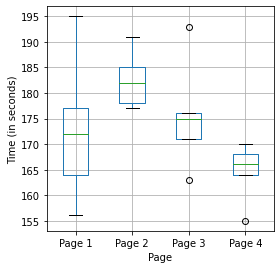

In [21]:
four_sessions = pd.read_csv(practicalstatspath+'four_sessions.csv')

ax = four_sessions.boxplot(by='Page', column='Time', figsize=(4, 4))
ax.set_xlabel('Page')
ax.set_ylabel('Time (in seconds)')
plt.suptitle('')
plt.title('')

plt.tight_layout()
plt.show()

> Could all the pages have the same underlying stickiness, and the differences among them be due to randomness?

- Null hypothesis: Pages do not have under distinct stickiness
- Alternative hypothesis: Pages do have statistically significant distinct stickiness
    * <span style="color:SteelBlue">Target level of confidence: 95%</span>

In [22]:
print('Observed means:', four_sessions.groupby('Page').mean().values.ravel())
observed_variance = four_sessions.groupby('Page').mean().var()[0]
print('Variance:', observed_variance)
# Permutation test example with stickiness
# Usually you will permute a small subset of each kind, but in this example, the data is small as is
def perm_test(df):
    df = df.copy()
    df['Time'] = np.random.permutation(df['Time'].values)
    return df.groupby('Page').mean().var()[0]
    
print(perm_test(four_sessions))

Observed means: [172.8 182.6 175.6 164.6]
Variance: 55.426666666666655
18.94666666666669


In [23]:
random.seed(1)
perm_variance = [perm_test(four_sessions) for _ in range(1000)]
p_val=np.mean([var > observed_variance for var in perm_variance])
print('p-value: ', p_val)
if p_val<0.05:
    print('Null hypothesis rejected')
else:
    print('Null hypothesis CANNOT be rejected')

p-value:  0.083
Null hypothesis CANNOT be rejected


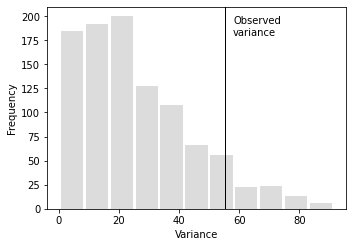

In [24]:
fig, ax = plt.subplots(figsize=(5, 3.54))
ax.hist(perm_variance, bins=11, rwidth=0.9,facecolor='gainsboro')
ax.axvline(x = observed_variance, color='black', lw=1)
ax.text(58, 180, 'Observed\nvariance')
ax.set_xlabel('Variance')
ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

#### Pragmatic (data product) practioner and statistical tests! 

> Conduct A/A tests

> Be careful about assumptions of causality
> - Anecdotes
>    * Microsoft Office's advanced features/attrition experiment
>         * Two teams conducted separate observational studies of two advanced features for Microsoft Office. Each concluded that the new feature it was assessing reduced attrition.
>    * Yahoo's experiment on whether the <a href="https://papers.ssrn.com/sol3/papers.cfm?abstract_id=2080235">display of ads for a brand increase searches for the brand name or related keywords</a>
>         * Importance of control.

> Complex experiment designs and chance of bugs in experiment design/data collection

> Sometime's understanding the "why?" is useful, but sometimes, you may have to just go with whatever "floats your boat"! 
> - Scurvy versus Bing's design color

# Suggested additional readings and references

> <a href="https://www.kdd.org/kdd2016/papers/files/adf0853-dengA.pdf">Data-Driven Metric Development for Online Controlled Experiments: Seven Lessons Learned</a> by Deng & Shi at KDD 2016


> <a href="https://hbr.org/2017/09/the-surprising-power-of-online-experiments">The Surprising Power of Online Experiments</a> by Ron Kohavi and Stefan Thomke, Harvard Business Review


> A <a href="https://machinelearningmastery.com/statistical-hypothesis-tests-in-python-cheat-sheet/ ">compilation of numerous statistical tests</a> with Python code snippets (Good collection of Python statistical test APIs. However, the content has not been vetted for correctness by me. Apply your own caution, particularly regarding the suggested interpretation of the tests.) 

<img src="pics/HippoThesisTasting.png" alt="Hippo Thesis Tasting!" width="500"/>

In [25]:
#### solution  for the 'toy' exercise on weighted statistics
# Weighted mean and median using state populations as weights, to determine the national figures 
print(np.average(state_df['Murder.Rate'], weights=state_df['Population']))
print(wquantiles.median(state_df['Murder.Rate'], weights=state_df['Population']))  
# wquantiles provides weighted quantiles
# You could use your own custom code instead as well

4.445833981123393
4.4
